In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [5]:
base = pd.read_csv('insurance.csv')

In [8]:
base.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [7]:
base = base.drop(columns= ['Unnamed: 0'])

In [9]:
base.shape

(20000, 27)

In [11]:
y = base.iloc[:,7].values

In [13]:
x = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [14]:
labelencoder = LabelEncoder()

In [19]:
for i in range(x.shape[1]):
  if x[:,i].dtype == 'object':
    x[:,i] = labelencoder.fit_transform(x[:,1])

In [20]:
x

array([[1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=object)

In [28]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y, test_size=0.3, random_state=15)

In [29]:
modelo = GaussianNB()
modelo.fit(x_treinamento,y_treinamento)

GaussianNB()

In [30]:
previsoes = modelo.predict(x_teste)

In [31]:
previsoes

array(['Severe', 'None', 'None', ..., 'None', 'None', 'None'], dtype='<U8')

In [35]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.6353333333333333
[0.         0.         0.75010509 0.19565217]
0.6353333333333333
0.5923199639660212


In [38]:
report = classification_report(y_teste, previsoes)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Mild       0.00      0.00      0.00       542
    Moderate       0.00      0.00      0.00       481
        None       0.75      0.83      0.79      4276
      Severe       0.20      0.35      0.25       701

    accuracy                           0.64      6000
   macro avg       0.24      0.30      0.26      6000
weighted avg       0.56      0.64      0.59      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


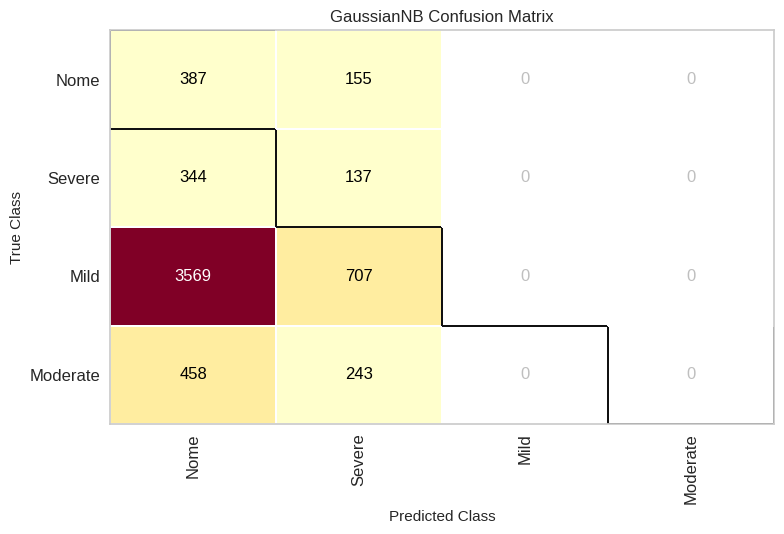

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [40]:
confusao = ConfusionMatrix(modelo, classes=['Nome', 'Severe', 'Mild', 'Moderate'])
confusao.fit(x_treinamento, y_treinamento)
confusao.score(x_teste, y_teste)
confusao.poof()